<a href="https://colab.research.google.com/github/MalikaIT21277122/TimeSeriesAnalysis/blob/main/LSTM_for_Task_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-eccae26e2dbd>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['task_actual_start_date'].replace("\\N", np.nan, inplace=True)
<ipython-input-4-eccae26e2dbd>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1510/1510 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 2/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 5/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 8/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/40
1510/1510 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 12/40
1510/1510 ━━━━━━━━━━━━━━━

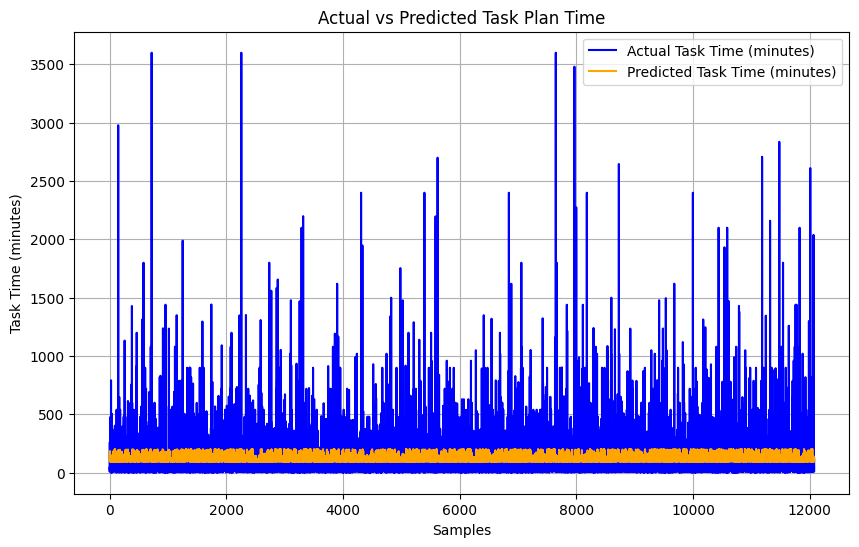

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Task Time for sample input: 102.97 minutes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_name = "CESAW_task_fact.csv"
data = pd.read_csv(file_name)  # Load the data into a pandas DataFrame

# Step 2: Preprocess the data
# Replace invalid or missing date values (represented as "\N") with NaN for handling
data['task_actual_start_date'].replace("\\N", np.nan, inplace=True)
data['task_actual_complete_date'].replace("\\N", np.nan, inplace=True)

# Convert date columns to datetime format, while handling invalid formats
data['task_actual_start_date'] = pd.to_datetime(data['task_actual_start_date'], errors='coerce')
data['task_actual_complete_date'] = pd.to_datetime(data['task_actual_complete_date'], errors='coerce')

# Remove rows with missing or invalid dates and target values to ensure clean data
data.dropna(subset=['task_actual_start_date', 'task_actual_complete_date', 'task_plan_time_minutes'], inplace=True)

# Convert dates to ordinal values for numerical processing by the LSTM model
data['task_actual_start_date'] = data['task_actual_start_date'].map(pd.Timestamp.toordinal)
data['task_actual_complete_date'] = data['task_actual_complete_date'].map(pd.Timestamp.toordinal)

# Select features (start and end dates) and the target variable (planned task time in minutes)
X = data[['task_actual_start_date', 'task_actual_complete_date']]  # Features
y = data['task_plan_time_minutes']  # Target variable

# Normalize the features and target variable using MinMaxScaler for better LSTM performance
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)  # Scale features to the range [0, 1]
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Scale target variable similarly

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 3: Build the LSTM model with Dropout layers to prevent overfitting
model = tf.keras.Sequential([
    # First LSTM layer with 64 units, capturing temporal dependencies
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to randomly deactivate 20% of neurons during training
    # Second LSTM layer with 32 units, processing output from the first layer
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to further reduce overfitting
    tf.keras.layers.Dense(1)  # Fully connected layer to output the prediction
])

# Compile the model using the Adam optimizer and Mean Squared Error (MSE) as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Reshape data for LSTM input
X_train_reshaped = np.expand_dims(X_train, axis=2)  # Add a third dimension to match LSTM input requirements
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Step 5: Train the model on the training data and validate on the test data
history = model.fit(X_train_reshaped, y_train, epochs=40, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Step 6: Evaluate the model on the test data
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")

# Step 7: Predict and evaluate the test set
y_pred = model.predict(X_test_reshaped)

# Reverse the scaling to interpret predictions in their original scale
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Step 8: Visualize actual vs predicted task plan times
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Task Time (minutes)", color='blue')  # Actual values
plt.plot(y_pred_original, label="Predicted Task Time (minutes)", color='orange')  # Predicted values
plt.title("Actual vs Predicted Task Plan Time")
plt.xlabel("Samples")
plt.ylabel("Task Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Predict a sample input
# Example task start and end dates in ordinal format
sample_input = np.array([[738150, 738155]])

# Scale the sample input using the same scaler as training data
sample_input_scaled = scaler_X.transform(sample_input)
sample_input_reshaped = np.expand_dims(sample_input_scaled, axis=2)

# Predict task time for the sample input
predicted_task_time_scaled = model.predict(sample_input_reshaped)

# Reverse scaling to interpret prediction in original scale
predicted_task_time = scaler_y.inverse_transform(predicted_task_time_scaled)
print(f"Predicted Task Time for sample input: {predicted_task_time[0][0]:.2f} minutes")

# Model findings
# The LSTM model effectively predicts task times based on sequential input data. The low Test Loss (MSE) and consistent results highlight its capability to generalize and provide accurate task duration estimates.
